In [1]:
from juliacall import Main as jl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

###################################################
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 25})
plt.rcParams.update({'figure.facecolor': 'white'})
plt.rcParams.update({'savefig.facecolor': 'white'})
###########################################


# colors
blue, orange, magenta, grey, green = '#0db4c3', '#eea021', '#ff0364', '#606172', '#3fb532'

# ===========================================================================


#long to run???
jl.seval("""using SequentialMeasureTransport""")
jl.seval("""import SequentialMeasureTransport as SMT""")
jl.seval("""using Distributions""")
jl.seval("""using PythonCall""")






In [16]:
sampler_name = 'sampler_likelihood3_N500_L8_phi50_algb1_2.jld2'
print('Load sampler and sample')
jl.seval(f"""sampler = SMT.load_sampler("{sampler_name}")""")
jl.seval("""sample = rand(sampler, 1000) #""")
#jl.seval("""pdf(sampler,zeros(5))""")

Load sampler and sample


1000-element Vector{Vector{Float64}}:
 [0.09682641735154801, 2.210657813932954, 0.08239343543390922]
 [0.7786972395862901, 1.2210076735896844, 0.7750981263296902]
 [0.2873022680975883, 0.9529529878971097, 0.8670202451804234]
 [0.5481586937749268, 2.2613881316736273, 0.6094862136996481]
 [0.9133840891064042, 2.234617149693595, 0.7470567080462016]
 [0.14264863933183128, 0.5113658448260081, 0.43442695144493937]
 [0.9888605770413419, 1.966810917328236, 0.49750982512596104]
 [0.8200664020110775, 0.7682675871786486, 0.35555284737128806]
 [0.8328357526809128, 2.574565117005061, 0.7171943239200603]
 [0.9939901660537632, 2.141465219060707, 0.9186195589449203]
 ⋮
 [0.8708382821031205, 1.5666065930787452, 0.9563040133426771]
 [0.7453824438686385, 1.517219555487007, 0.08983856354001693]
 [0.9806560138920859, 1.364973302849104, 0.4377262419608962]
 [0.7564480318058961, 0.2697195547815154, 0.8315745253759842]
 [0.7889188633703483, 2.2574121708470627, 0.607448332060848]
 [0.4402008003927185, 0.174345

In [14]:
sampler_name = 'sampler_likelihood3_N500_L8_phi50_algb1_2.jld2'
print('Load sampler and sample')
jl.seval(f"""sampler = SMT.load_sampler("{sampler_name}")""")
jl.seval("""sample = rand(sampler, 1000) #""")
#jl.seval("""pdf(sampler,zeros(5))""")

Load sampler and sample


1000-element Vector{Vector{Float64}}:
 [0.18224785247146258, 0.6479496476945806, 0.2310460347629749]
 [0.35435320237868767, 2.9653092244238874, 0.1523763054220915]
 [0.25197366263055077, 2.7639235343643342, 0.0035067242156025173]
 [0.8447458961881243, 1.1999281137211197, 0.2375012492532116]
 [0.7358606264652982, 1.6805538443017667, 0.43032363572371807]
 [0.44925805128758406, 2.6473666477785063, 0.011371551968872544]
 [0.6377697591607069, 0.2478761978558792, 0.20519266370069417]
 [0.3607423258911306, 1.50754176383613, 0.9712380342851796]
 [0.378320198461156, 1.8309549533515397, 0.1055969959648496]
 [0.729490215075456, 1.6867141749476802, 0.4031638195756359]
 ⋮
 [0.9895288839494474, 0.15813714620326, 0.03606209039920155]
 [0.07751227565517525, 0.21011197293213837, 0.8385009168066566]
 [0.42525544099168056, 2.0221076935156046, 0.7510256114310662]
 [0.7545845999056874, 2.4187506775957455, 0.14727335168579092]
 [0.6436213626486419, 0.3975321774853176, 0.4234108473209716]
 [0.364939383660412

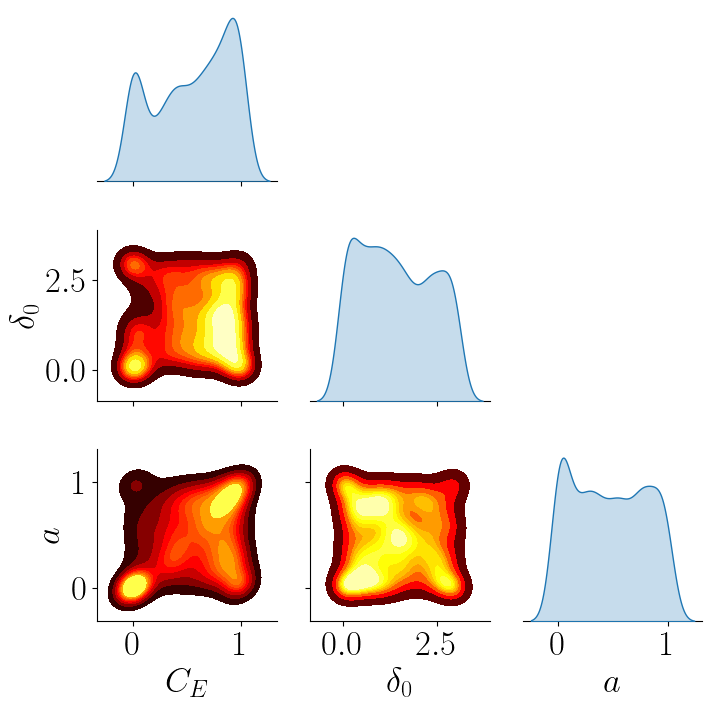

In [17]:
#convert to numpy
sample_py = np.array(jl.seval(""" Py(hcat(sample...)) """))


#convert to Panda dataframe
df = pd.DataFrame(sample_py.T, columns=[r'$C_E$', r'$\delta_0$', r'$a$'])

g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_upper(sns.jointplot)
#g.map_upper(sns.histplot)
#g.map_lower(sns.heatmap, color=blue)
# g.map_lower(sns.scatterplot)

# g.map_diag(sns.histplot, kde=True, color=orange )

g = g.map_upper(sns.scatterplot,marker='+')
g = g.map_lower(sns.kdeplot, cmap="hot",fill=True)
g = g.map_diag(sns.kdeplot, fill=True)
plt.show()

In [ ]:
sampler_name = 'sampler_likelihood2_N2000_L2_phi50.jld2'
print('Load sampler and sample')
jl.seval(f"""sampler = SMT.load_sampler("{sampler_name}")""")
jl.seval("""sample = rand(sampler, 10000) #""")



Load sampler and sample


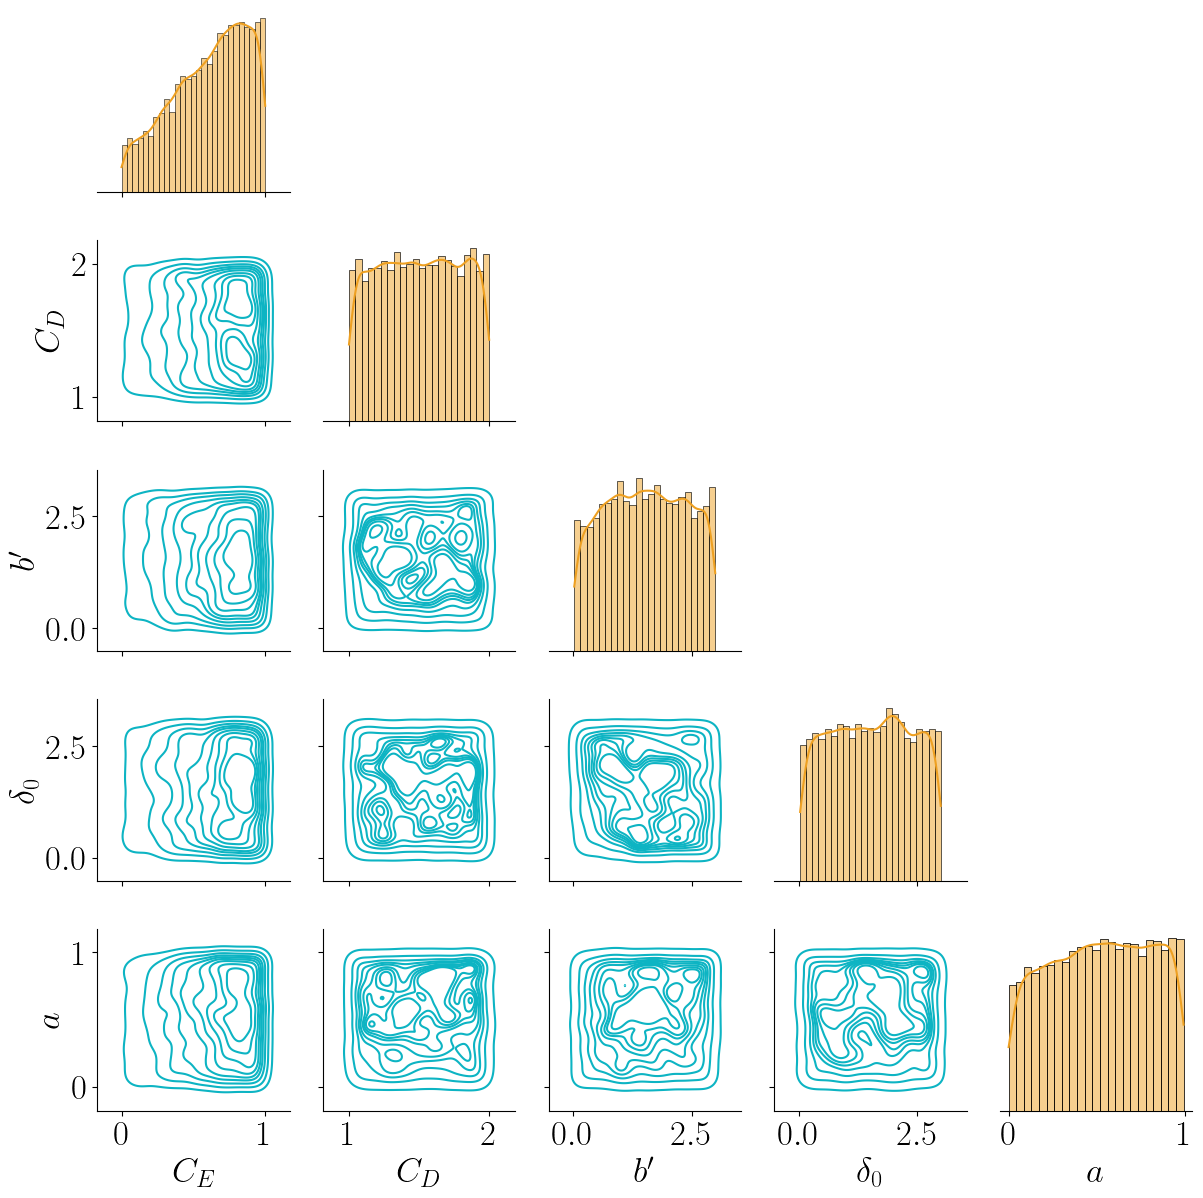

In [ ]:
sampler_name = 'sampler_likelihood2_N2000_L2_phi50.jld2'
print('Load sampler and sample')
jl.seval(f"""sampler = SMT.load_sampler("{sampler_name}")""")
jl.seval("""sample = rand(sampler, 10000) #""")

#convert to numpy
sample_py = np.array(jl.seval(""" Py(hcat(sample...)) """))


#convert to Panda dataframe
df = pd.DataFrame(sample_py.T, columns=[r'$C_E$', r'$C_D$', r'$b^\prime$', r'$\delta_0$', r'$a$'])

g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_upper(sns.jointplot)
#g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, color=blue)
#g.map_lower(sns.scatterplot)

g.map_diag(sns.histplot, kde=True, color=orange )

Load sampler and sample


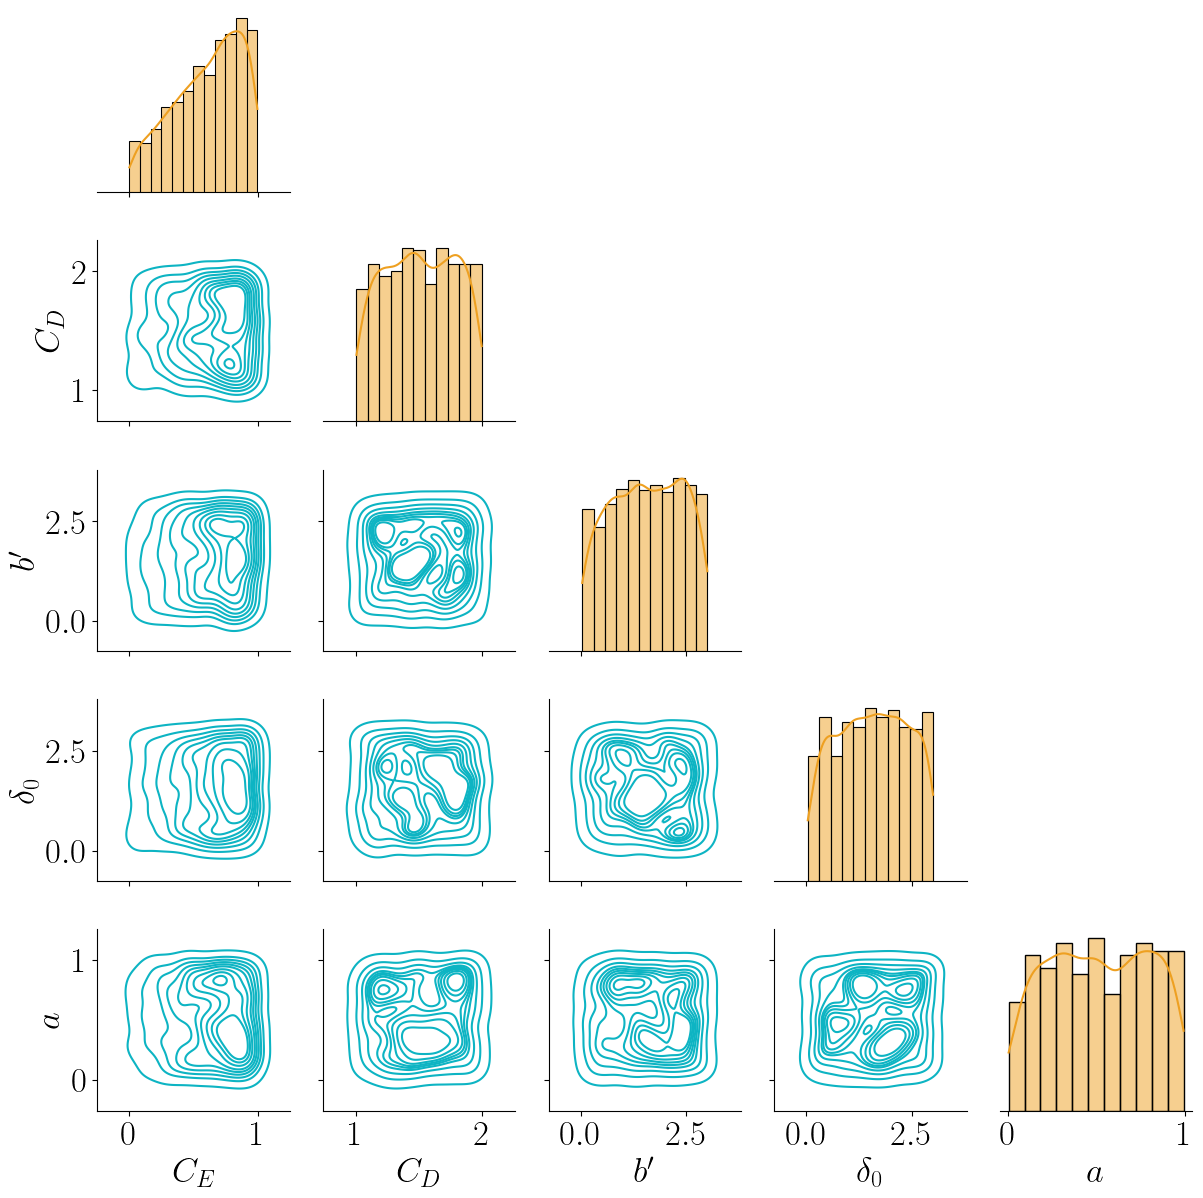

In [ ]:
sampler_name = 'sampler_likelihood2_N2000_L2_phi50.jld2'
print('Load sampler and sample')
jl.seval(f"""sampler = SMT.load_sampler("{sampler_name}")""")
jl.seval("""sample = rand(sampler, 1000) #""")

#convert to numpy
sample_py = np.array(jl.seval(""" Py(hcat(sample...)) """))


#convert to Panda dataframe
df = pd.DataFrame(sample_py.T, columns=[r'$C_E$', r'$C_D$', r'$b^\prime$', r'$\delta_0$', r'$a$'])

g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_upper(sns.jointplot)
#g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, color=blue)
#g.map_lower(sns.scatterplot)

g.map_diag(sns.histplot, kde=True, color=orange )

Load sampler and sample


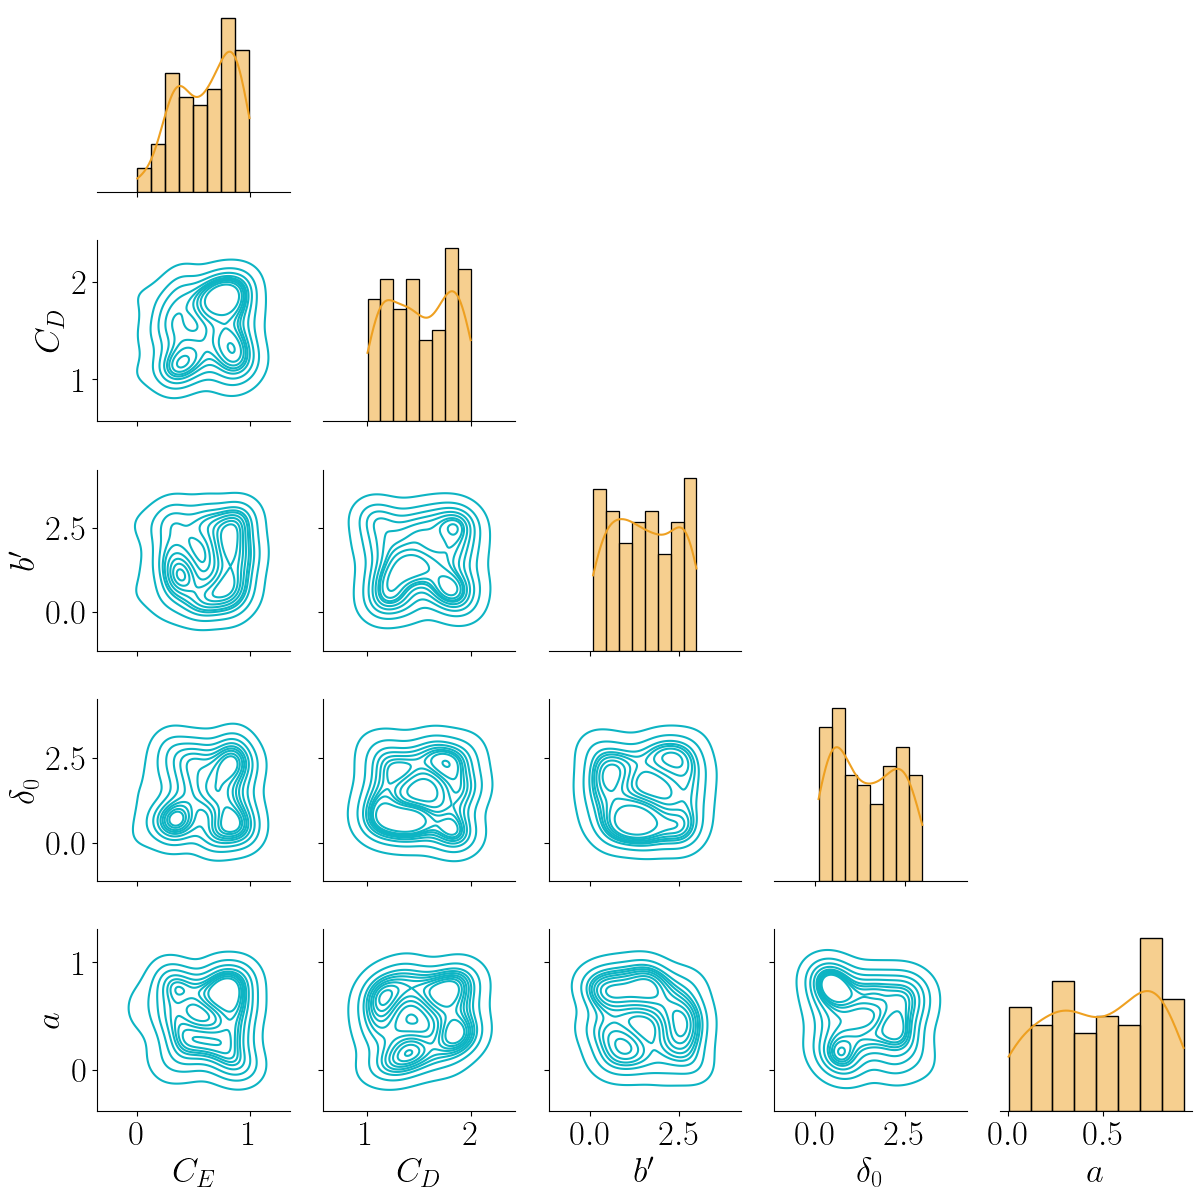

In [ ]:
sampler_name = 'sampler_likelihood2_N2000_L4_phi50.jld2'
print('Load sampler and sample')
jl.seval(f"""sampler = SMT.load_sampler("{sampler_name}")""")
jl.seval("""sample = rand(sampler, 100) #""")

#convert to numpy
sample_py = np.array(jl.seval(""" Py(hcat(sample...)) """))


#convert to Panda dataframe
df = pd.DataFrame(sample_py.T, columns=[r'$C_E$', r'$C_D$', r'$b^\prime$', r'$\delta_0$', r'$a$'])

g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_upper(sns.jointplot)
#g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, color=blue)
#g.map_lower(sns.scatterplot)

g.map_diag(sns.histplot, kde=True, color=orange )

In [ ]:
8491/60/60

2.358611111111111